In [16]:
from sympy import *
import inspect
import numpy as np
from fractions import Fraction
init_printing()
%run -i symbol_func_spaces.py


In [17]:
s=Symbol("s")
p=Symbol("p")
n=Symbol("n")
q=Symbol("q")
f=Symbol("f")
g=Symbol("g")
alpha=Symbol("alpha")
r=Symbol("r")
k=Symbol("k")
l=Symbol("l")

In [18]:
Holder_Space(r,alpha,f)

In [4]:
class Sobolev_Embed(Function):
    @classmethod
    def eval(cls, k, p,q,l,n,f):
        pass
    def _latex(self, printer):
         k,p,q,l,n,f = self.args
         _k,_p,_q,_l,_f = printer._print(k),printer._print(p), printer._print(q),printer._print(l),printer._print(f)
         if k==1 and l==0:
             return r'\left \|  %s \right \|_{L^{ %s *}} \leq \left \|  %s \right \|_{W^{1,%s}}' % (_f,_p,_f,_p)
         if (1/p-1/q+(k-l)/n==0):
             return r'\left \|  %s \right \|_{W^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_l,_q,_f,_k,_p)
         if n<p*k and q+l==k-n/p:
             return r'\left \|  %s \right \|_{C^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_q,_l,_f,_k,_p)
             

In [5]:
Sobolev_Embed(1,2,3,4,1,f)

In [6]:
class Sobolev_Embed_auto(Function):
    @classmethod
    def eval(cls, k, p,n,f):
        res=[]
        if 1<=p<n:
            m=float(1/p-k/n)
            q_1=np.linspace(0.01,float(1/p),10,dtype=float)
            for i in range(len(q_1)):
                l=Rational(float(k+n*q_1[i]-n*(1/p))).limit_denominator(100)
                q=Rational(1/q_1[i]).limit_denominator(100)
                res.append(Sobolev_Space(l,q,f))
               
        if k==1:
            return Lp(Rational(p-1,p),f)
        if n<p*k:
            m= float(k-n/p)
            r=np.linspace(0,m,10,dtype=float)
            res=[]
            for i in range(len(r)):
                r_use=Rational(float(r[i])).limit_denominator(100)
                alpha_use=Rational(m-r_use).limit_denominator(100)
                res.append(Holder_Space(r_use, alpha_use,f))
        return res  
    def _latex(self, printer):
         k,p,n,f = self.args
         _k,_p,_n,_f = printer._print(k),printer._print(p), printer._print(n),printer._print(f)
         if k==1 and l==0:
             return r'\left \|  %s \right \|_{L^{ %s *}} \leq \left \|  %s \right \|_{W^{1,%s}}' % (_f,_p,_f,_p)
         if (1/p-1/q+(k-l)/n==0):
             return r'\left \|  %s \right \|_{W^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_l,_q,_f,_k,_p)
         if n<p*k and q+l==k-n/p:
             return r'\left \|  %s \right \|_{C^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_q,_l,_f,_k,_p)

In [9]:
Sobolev_Embed_auto(2,2,1,f**2)

'\\left[ \\left \\|  f^{2} \\right \\|_{C^{0,\\frac{3}{2}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{1}{6},\\frac{4}{3}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{1}{3},\\frac{7}{6}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{1}{2},1}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{2}{3},\\frac{5}{6}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{5}{6},\\frac{2}{3}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{1,\\frac{1}{2}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{7}{6},\\frac{1}{3}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{4}{3},\\frac{1}{6}}}, \\  \\left \\|  f^{2} \\right \\|_{C^{\\frac{3}{2},0}}\\right]'

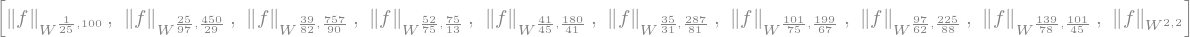

In [8]:
Sobolev_Embed_auto(2,2,4,f)

In [ ]:
class Sobolev_Embed_auto_bdd(Function):
    @classmethod
    def eval(cls, k, p,n,f):
        res=[]
        if 1<=p<n:
            m=float(1/p-k/n)
            q_1=np.linspace(0.01,float(1/p),10,dtype=float)
            for i in range(len(q_1)):
                l=float(k+n*q_1[i]-n*(1/p))
                res.append(Sobolev_Space(Fraction.from_float(l),Fraction.from_float(1/q_1[i]),f))
        if k==1:
            return Lp(Rational(p-1,p),f)
        if n<p*k:
            m= float(k-n/p)
            r=np.linspace(0,m,10,dtype=float)
            res=[]
            for i in range(len(r)):
                res.append(Holder_Space(Fraction.from_float(r[i]), Fraction.from_float(m-r[i]),f))
        return res  
    def _latex(self, printer):
         k,p,n,f = self.args
         _k,_p,_n,_f = printer._print(k),printer._print(p), printer._print(n),printer._print(f)
         if k==1 and l==0:
             return r'\left \|  %s \right \|_{L^{ %s *}} \leq \left \|  %s \right \|_{W^{1,%s}}' % (_f,_p,_f,_p)
         if (1/p-1/q+(k-l)/n==0):
             return r'\left \|  %s \right \|_{W^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_l,_q,_f,_k,_p)
         if n<p*k and q+l==k-n/p:
             return r'\left \|  %s \right \|_{C^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_q,_l,_f,_k,_p)

In [42]:
class Holder_ineq(Function):
    @classmethod
    def eval(cls,r,f,g):
        res=[]
        if 1<=r<oo:
            p=np.linspace(0.01,float(1/r),10,dtype=float)
            for i in range(len(p)):
                p_use= Rational(float(1/p[i])).limit_denominator(10)
                q_1 =float(1/r)-p[i]
                q_use= Rational(1/q_1).limit_denominator(10)
                res.append(Lp(p_use,f)* Lp(q_use,g))
        return res
    def _latex(self, printer):
         k,p,n,f = self.args
         _k,_p,_n,_f = printer._print(k),printer._print(p), printer._print(n),printer._print(f)
         if k==1 and l==0:
             return r'\left \|  %s \right \|_{L^{ %s *}} \leq \left \|  %s \right \|_{W^{1,%s}}' % (_f,_p,_f,_p)
         if (1/p-1/q+(k-l)/n==0):
             return r'\left \|  %s \right \|_{W^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_l,_q,_f,_k,_p)
         if n<p*k and q+l==k-n/p:
             return r'\left \|  %s \right \|_{C^{%s,%s}} \leq \left \|  %s \right \|_{W^{%s,%s}}' % (_f,_q,_l,_f,_k,_p)

/tmp/ipykernel_6791/1175408373.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  q_use= Rational(1/q_1).limit_denominator(10)


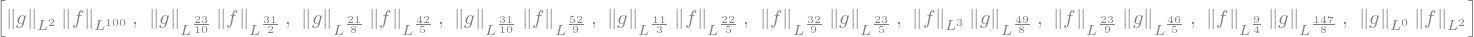

In [43]:
Holder_ineq(2,f,g)